# 1 - Web Scraping / Scrapeo con BeatifulSoup (Bs4)
<p align = 'center'>
<img src = 'https://editor.analyticsvidhya.com/uploads/75676cover.jfif'/>
</p>

Web scraping o raspado web, es una técnica utilizada mediante programas de software para extraer información de sitios web de manera automatizada y masiva. Usualmente, estos programas simulan la navegación de un humano en la web ya sea utilizando el protocolo HTTP manualmente, o incrustando un navegador en una aplicación.

El web scraping está muy relacionado con la indexación de la web, la cual indexa la información de la web utilizando un robot y es una técnica universal adoptada por la mayoría de los motores de búsqueda. Sin embargo, el web scraping se enfoca más en la transformación de datos sin estructura en la web, como el formato HTML, en datos estructurados que pueden ser almacenados y analizados en una base de datos central, en una hoja de cálculo o en alguna otra fuente de almacenamiento. Alguno de los usos del web scraping son la comparación de precios en tiendas, la monitorización de datos relacionados con el clima de cierta región, la detección de cambios en sitios webs y la integración de datos en sitios webs.

En los últimos años el web scraping se ha convertido en una **técnica muy utilizada** dentro del sector del posicionamiento web gracias a su capacidad de generar grandes cantidades de datos para crear contenidos de calidad.

Podríamos pensar que el web scraping es nuestro recurso a **falta de una API o un feed RSS**. A falta de una fuente de datos, siempre podemos extraer aquello que sale por pantalla.

Todo aquello que necesite interactividad con la página web va a necesitar **selenium**, una librería que nos permite darle instrucciones a nuestro explorador para poder simular los movimientos que haríamos por dentro de la web:
 - Cambiar de página
 - Rellenar formularios
 - Hacer click en botones
 - Cerrar pop-ups
 - Rechazar cookies
 
Por otro lado, todo aquello que sea estático podemos tirar únicamente de **BeautifulSoup**, la primera librería para scrapeo que vamos a conocer que nos permite, una vez cargada la página de la que vamos a extraer la información, recorrer el código HTML y quedarnos con aquellos datos que necesitemos.

Tendremos que realizar scrapeo cuando no dispongamos de una fuente más sencilla de la que obtener información como una API, una base de datos, fichero, etc...

# 2 - Extracción de los datos del HTML

Para scrapear necesitamos saber que pinta tiene la **estructura general** que tiene un HTML.

El HTML consiste en contenido `<etiquetado>`, es como si fueran cajas de contenido, organizado de manera jerárquica:

```
<html>
    <head>
        <title>Titulo de la pagina</title>
    </head>
    <body>
        <h1>Cabecera</h1>
        <p>Parrafo</p>
    </body>
</html>
```

$$$$

Las etiquetas el HTML se pueden clasificar en varios grupos, dependiendo del tipo de contenido que posea. Estos son algunos ejemplos:

+ cabecera: `<h1>`, `<h2>`, `<h3>`, `<hgroup>`...
+ texto: `<b>`, `<p>`, `<span>`...
+ embebido: `<audio>`, `<img>`, `<video>`...
+ tabular: `<table>`, `<tr>`, `<td>`, `<tbody>`...
+ secciones: `<header>`, `<section>`, `<article>`...
+ metadata: `<meta>`, `<title>`, `<script>`...

$$$$


Las etiquetas pueden tener atributos. Por ejemplo:

`<div class="text-monospace" id="name_132", href="www.example.com"> Contenido de la pagina </div>`

Esta etiqueta `div` tiene los siguientes atributos:

+ class: atributo con valor "text-monospace". La clase no es única en la página, varios elementos pueden tener la misma clase.
+ id: atributo con valor "name_132". El id de una etiqueta la identifica de manera unívoca, no puede haber dos etiquetas con el mismo id.
+ href: atributo con valor "www.example.com". El href suele contener el link a otra parte de la página.

Siguiendo con la analogía de las cajas, si una etiqueta de HTML es una caja, los atributos serían las pegatinas pegadas en la tapa de la caja.

Conociendo cual es el contenido que queremos extraer, debemos encontrar las **etiquetas** que nos interesan dentro de todo el HTML de la página web.

Para ello vamos a usar **[BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)**.

In [ ]:
#%pip install beautifulsoup4

In [1]:
import requests as req
from bs4 import BeautifulSoup as bs #este alias es standard

# 3 - Scrapeando **WIKIPEDIA**

Vamos a echar un ojo a esta web **[Países europeos según esperanza de vida](https://en.wikipedia.org/wiki/List_of_European_countries_by_life_expectancy)** para intentar sacar la información de la tabla que contiene la esperanza de vida de los países europeos.

Hasta ahora habíamos visto `requests`para hacer llamadas a url (normalmente endpoints de las APIS que hemos estado mirando)

¿Y si llamamos a una url de una web digamos `normal`?

In [ ]:
#url de la pagina a scrapear
url = 'https://en.wikipedia.org/wiki/List_of_European_countries_by_life_expectancy'

html = req.get(url).text #obtenemos el contenido de la pagina
html[:1000] #mostramos los primeros 1000 caracteres

In [ ]:
str(html).split('/head>')[1][:1000] #mostramos los primeros 1000 caracteres de la seccion body / Esto es una gualtrapada para ver el codigo html de la pagina

In [4]:
# cantidad de caracteres que tiene esta parte del codigo html
len(str(html).split('/head>')[1])

632766

Esto es infumable y para nada práctico. Para ello BeautifulSoup entra en juego para facilitarnos la vida.

Vimos en la docu, la manera de pasarle un `html` para que nos lo parsee (traduzca/convierta) en un objeto de BeautifulSoup muchos más manejable, amigable y con muchos métodos que nos facilitan el poder navegar el `html` para encontrar el contenido exacto que queremos extraer.

Así, al **parsearlo**, es mucho más **legible**. A este objeto por convención se le llama `soup`.

In [5]:
soup = bs(html, 'html.parser') #creamos el objeto soup, y le decimos que lo que le pasamos tiene pinta de html
type(soup)

bs4.BeautifulSoup

In [ ]:
print(soup.prettify())

Vamos a acceder a la tabla que hay en la web. 

En primer lugar es necesario entender cómo se estructura una tabla en código HTML.

Gracias a BeautifulSoup podemos encontrar los diferentes **elementos** de una manera muy **veloz**.

Hay varias funciones para encontrar elementos concretos. `find()` y `find_all()` son dos ejemplos.

Vamos a ver como es la **estructura general** de una tabla en html:

![](https://www.corelangs.com/html/tables/img/html-table-structure.png)

![](https://www.ourtutorials.in/html/img/table1.JPG)

In [ ]:
# Tabla
tabla = soup.find('table') #buscamos la tabla, en este caso solo hay una. Si hubiera mas, solo nos devolveria la primera. Si queremos todas, usamos find_all
# soup.find_all('table')  -->  En caso de que tuviéramos más de una tabla esta sería la línea de código correcta para acceder a todas ellas
tabla

In [9]:
# cuantas tablas hay...?
len(soup.find_all('table'))

15

In [ ]:
tabla.prettify()

In [ ]:
print(tabla.prettify()[:1000])

In [13]:
# Filas de la tabla
filas = tabla.find_all('tr') # tr --> table row
len(filas) #Acordaros que vimos que find all nos devolvía una lista con todos los elementos encontrados

59

In [14]:
type(filas) # ResultSet es una lista

bs4.element.ResultSet

Al ser una lista puedo recorrer cada elemento.

In [ ]:
# Texto del primer elemento de la lista
filas[0].text

In [11]:
print(filas[0].text)


Countries andterritories

Life expectancy for population in general

Life expectancy for male

Life expectancy for female

Sex gap

Population(thous.)





In [16]:
# texto de cada fila solo para los 3 primeros elementos
for f in filas[:3]:
    print(type(f.text), f.text)
    print('-----------------')

<class 'str'> 
Countries andterritories

Life expectancy for population in general

Life expectancy for male

Life expectancy for female

Sex gap

Population(thous.)



-----------------
<class 'str'> 
at birth

bonus0→15

at 15

bonus15→65

at 65

bonus65→80

at 80

at birth

at 15

at 65

at 80

at birth

at 15

at 65

at 80

at birth

at 15

at 65

at 80

-----------------
<class 'str'> 
 Monaco
86.37
0.45
71.82
1.40
23.21
3.09
11.30
84.45
69.90
21.56
10.14
88.50
73.95
25.05
12.50
4.06
4.05
3.49
2.36
39


-----------------


In [17]:
#vamos a sacar el texto de 3 primeros elementos del cuerpo de la tabla
for f in filas[2:5]:
    print(type(f.text), f.text)
    print('-----------------')

<class 'str'> 
 Monaco
86.37
0.45
71.82
1.40
23.21
3.09
11.30
84.45
69.90
21.56
10.14
88.50
73.95
25.05
12.50
4.06
4.05
3.49
2.36
39


-----------------
<class 'str'> 
 San Marino
85.71
0.15
70.86
1.78
22.64
2.88
10.52
84.21
69.36
21.25
9.52
87.10
72.24
23.90
11.31
2.89
2.88
2.65
1.79
34


-----------------
<class 'str'> 
 Andorra
84.04
0.58
69.62
1.85
21.47
3.72
10.19
82.10
67.68
19.81
9.03
86.11
71.70
23.18
11.16
4.01
4.02
3.36
2.13
81


-----------------


In [18]:
f.text

'\n\xa0Andorra\n84.04\n0.58\n69.62\n1.85\n21.47\n3.72\n10.19\n82.10\n67.68\n19.81\n9.03\n86.11\n71.70\n23.18\n11.16\n4.01\n4.02\n3.36\n2.13\n81\n\n'

In [14]:
f.text.split('\n')

['',
 '\xa0Andorra',
 '84.04',
 '0.58',
 '69.62',
 '1.85',
 '21.47',
 '3.72',
 '10.19',
 '82.10',
 '67.68',
 '19.81',
 '9.03',
 '86.11',
 '71.70',
 '23.18',
 '11.16',
 '4.01',
 '4.02',
 '3.36',
 '2.13',
 '81',
 '',
 '']

In [19]:
# Hagamos una lista, que contenga una lista por fila
# strip() --> quita los espacios que haya delante y detrás del texto
# split() --> va a separar la lista por la secuencia de caracteres '\n' para hacer una lista
filas_limpias = [f.text.strip().split('\n') for f in filas]
filas_limpias[:5]

[['Countries andterritories',
  '',
  'Life expectancy for population in general',
  '',
  'Life expectancy for male',
  '',
  'Life expectancy for female',
  '',
  'Sex gap',
  '',
  'Population(thous.)'],
 ['at birth',
  '',
  'bonus0→15',
  '',
  'at 15',
  '',
  'bonus15→65',
  '',
  'at 65',
  '',
  'bonus65→80',
  '',
  'at 80',
  '',
  'at birth',
  '',
  'at 15',
  '',
  'at 65',
  '',
  'at 80',
  '',
  'at birth',
  '',
  'at 15',
  '',
  'at 65',
  '',
  'at 80',
  '',
  'at birth',
  '',
  'at 15',
  '',
  'at 65',
  '',
  'at 80'],
 ['Monaco',
  '86.37',
  '0.45',
  '71.82',
  '1.40',
  '23.21',
  '3.09',
  '11.30',
  '84.45',
  '69.90',
  '21.56',
  '10.14',
  '88.50',
  '73.95',
  '25.05',
  '12.50',
  '4.06',
  '4.05',
  '3.49',
  '2.36',
  '39'],
 ['San Marino',
  '85.71',
  '0.15',
  '70.86',
  '1.78',
  '22.64',
  '2.88',
  '10.52',
  '84.21',
  '69.36',
  '21.25',
  '9.52',
  '87.10',
  '72.24',
  '23.90',
  '11.31',
  '2.89',
  '2.88',
  '2.65',
  '1.79',
  '34'],


In [20]:
# La primera fila es la cabecera, y hay que limpiar los espacios en blanco
cabecera = filas_limpias[0]
cabecera

['Countries andterritories',
 '',
 'Life expectancy for population in general',
 '',
 'Life expectancy for male',
 '',
 'Life expectancy for female',
 '',
 'Sex gap',
 '',
 'Population(thous.)']

In [21]:
# vamos a arreglarlo
final = [] # aquí el resultado final limpio
for fila in filas_limpias:
    tmp = [] # lista vacía temporal
    for elemento in fila:
        if elemento != '':
            tmp.append(elemento)
    final.append(tmp)

final[:5]

[['Countries andterritories',
  'Life expectancy for population in general',
  'Life expectancy for male',
  'Life expectancy for female',
  'Sex gap',
  'Population(thous.)'],
 ['at birth',
  'bonus0→15',
  'at 15',
  'bonus15→65',
  'at 65',
  'bonus65→80',
  'at 80',
  'at birth',
  'at 15',
  'at 65',
  'at 80',
  'at birth',
  'at 15',
  'at 65',
  'at 80',
  'at birth',
  'at 15',
  'at 65',
  'at 80'],
 ['Monaco',
  '86.37',
  '0.45',
  '71.82',
  '1.40',
  '23.21',
  '3.09',
  '11.30',
  '84.45',
  '69.90',
  '21.56',
  '10.14',
  '88.50',
  '73.95',
  '25.05',
  '12.50',
  '4.06',
  '4.05',
  '3.49',
  '2.36',
  '39'],
 ['San Marino',
  '85.71',
  '0.15',
  '70.86',
  '1.78',
  '22.64',
  '2.88',
  '10.52',
  '84.21',
  '69.36',
  '21.25',
  '9.52',
  '87.10',
  '72.24',
  '23.90',
  '11.31',
  '2.89',
  '2.88',
  '2.65',
  '1.79',
  '34'],
 ['Andorra',
  '84.04',
  '0.58',
  '69.62',
  '1.85',
  '21.47',
  '3.72',
  '10.19',
  '82.10',
  '67.68',
  '19.81',
  '9.03',
  '86.11

Hasta ahora hemos cogido la información contenida en una página que tiene una tabla. Hemos identificado la tabla y hemos accedido a ella. Con `find()` hemos buscado la etiqueta que nos interesa para ello (`<table>`). Una vez obtenido el HTML únicamente de la tabla lo hemos traducido para que sea algo más legible y hemos arreglado su contenido para poder llegar al siguiente paso: crear nuestro DataFrame.

In [22]:
final[0] # primer elemento de la lista final

['Countries andterritories',
 'Life expectancy for population in general',
 'Life expectancy for male',
 'Life expectancy for female',
 'Sex gap',
 'Population(thous.)']

In [23]:
final[1] # segundo elemento de la lista final

['at birth',
 'bonus0→15',
 'at 15',
 'bonus15→65',
 'at 65',
 'bonus65→80',
 'at 80',
 'at birth',
 'at 15',
 'at 65',
 'at 80',
 'at birth',
 'at 15',
 'at 65',
 'at 80',
 'at birth',
 'at 15',
 'at 65',
 'at 80']

In [24]:
final[2]

['Monaco',
 '86.37',
 '0.45',
 '71.82',
 '1.40',
 '23.21',
 '3.09',
 '11.30',
 '84.45',
 '69.90',
 '21.56',
 '10.14',
 '88.50',
 '73.95',
 '25.05',
 '12.50',
 '4.06',
 '4.05',
 '3.49',
 '2.36',
 '39']

Para poder crear el DataFrame a partir de listas es necesario que todas ellas tengan la **misma cantidad de elementos**, tanto la que dará nombre a las columnas como la que contendrá la información de las filas.

In [25]:
import pandas as pd

In [26]:
nombres_columnas = final[1] # la primera fila la omitimos, nos quedamos la segunda, pero tenemos que arreglarla
nombres_columnas

['at birth',
 'bonus0→15',
 'at 15',
 'bonus15→65',
 'at 65',
 'bonus65→80',
 'at 80',
 'at birth',
 'at 15',
 'at 65',
 'at 80',
 'at birth',
 'at 15',
 'at 65',
 'at 80',
 'at birth',
 'at 15',
 'at 65',
 'at 80']

In [27]:
data = final[2:] # desde la primera fila con información, la de Liechtenstein, hasta el final

In [28]:
len(data[0]), len(nombres_columnas) # las filas tienen info para más columnas que la lista que dará nombre a las columnas...

(21, 19)

En este caso no coinciden. Así que tendremos que hacer algún pequeño arreglo extra antes de conseguir hacer el DataFrame.

In [29]:
nombres_columnas

['at birth',
 'bonus0→15',
 'at 15',
 'bonus15→65',
 'at 65',
 'bonus65→80',
 'at 80',
 'at birth',
 'at 15',
 'at 65',
 'at 80',
 'at birth',
 'at 15',
 'at 65',
 'at 80',
 'at birth',
 'at 15',
 'at 65',
 'at 80']

In [30]:
data[0]

['Monaco',
 '86.37',
 '0.45',
 '71.82',
 '1.40',
 '23.21',
 '3.09',
 '11.30',
 '84.45',
 '69.90',
 '21.56',
 '10.14',
 '88.50',
 '73.95',
 '25.05',
 '12.50',
 '4.06',
 '4.05',
 '3.49',
 '2.36',
 '39']

In [31]:
nombres_columnas.insert(0, 'Country') # al añadir en primer lugar 'Country' ya tenemos tantos elementos como en el resto, que serán las filas

In [33]:
nombres_columnas.append('Poblacion')

In [34]:
df = pd.DataFrame(data, columns = nombres_columnas)

In [35]:
df.head(10)

,Country,at birth,bonus0→15,at 15,bonus15→65,at 65,bonus65→80,at 80,at birth,at 15,...,at 80,at birth,at 15,at 65,at 80,at birth,at 15,at 65,at 80,Poblacion
0,Monaco,86.37,0.45,71.82,1.40,23.21,3.09,11.30,84.45,69.90,...,10.14,88.50,73.95,25.05,12.50,4.06,4.05,3.49,2.36,39
1,San Marino,85.71,0.15,70.86,1.78,22.64,2.88,10.52,84.21,69.36,...,9.52,87.10,72.24,23.90,11.31,2.89,2.88,2.65,1.79,34
2,Andorra,84.04,0.58,69.62,1.85,21.47,3.72,10.19,82.10,67.68,...,9.03,86.11,71.70,23.18,11.16,4.01,4.02,3.36,2.13,81
3,Switzerland,83.95,0.36,69.31,2.20,21.51,3.46,9.97,82.01,67.38,...,9.08,85.83,71.17,22.83,10.63,3.82,3.80,2.78,1.54,8871
4,Italy,83.72,0.26,68.98,2.33,21.31,3.46,9.77,81.57,66.84,...,8.77,85.75,70.99,22.76,10.50,4.18,4.15,3.09,1.73,59499
5,Spain,83.67,0.29,68.96,2.58,21.54,3.57,10.11,80.96,66.26,...,8.96,86.31,71.58,23.40,10.94,5.35,5.32,3.92,1.98,47912
6,Liechtenstein,83.63,0.62,69.25,1.92,21.17,3.81,9.98,81.84,67.43,...,8.91,85.32,70.97,22.58,10.75,3.48,3.54,2.96,1.84,40
7,Gibraltar,83.55,1.05,69.60,2.66,22.26,3.70,10.96,80.92,67.08,...,9.61,86.14,72.05,23.95,11.93,5.23,4.97,3.56,2.31,38
8,France,83.33,0.39,68.72,3.31,22.03,3.58,10.61,80.43,65.85,...,9.41,86.09,71.44,23.78,11.45,5.66,5.59,3.78,2.04,66439
9,Norway,83.31,0.25,68.56,2.19,20.75,3.53,9.28,81.75,67.02,...,8.37,84.85,70.07,21.84,10.02,3.10,3.05,2.27,1.65,5519


In [ ]:
#RETO

#Vamos a escrapear la tabla de esta web --> https://en.wikipedia.org/wiki/List_of_countries_by_GNI_(nominal)_per_capita
#Escrapeamos la primera tabla, y cuando lo tengamos vamos con la segunda
#La salida debe ser un dataframe limpito,

1. hago el get de la pagina
```python
html = req.get(url).text --> req.get(url).content
```
2. convierto mi html a una sopa
```python
soup = bs(html, 'html.parser')
```

3. busco mi tabla
--> funcion `.find('nombre_etiqueta')` o funcion `.find_all('nombre_etiqueta')`

4. busco las filas
--> funcion `.find_all()` estoy buscando muchas coincidencias

5. buscate la vida para limpiarlo --> para ello necesitas el contenido
   1. Atención a los espacios
   2. Atención a si hay saltos de línea
6. haz un DataFrame

### Repaso `comprehension list`

In [67]:
# lo que quiero por cada elemento en el iterable
[num for num in range(1, 5)]

[1, 2, 3, 4]

In [68]:
# con condicion, if...
# lo que quiero por cada elemento en el iterable si cumple la condicion
[num for num in range(1, 5) if num%2]

[1, 3]

In [69]:
# con condicion, if/else...
# lo que quiero si cumple la condicion, en el resto de casos haz esto otro,
# por cada elemento en el iterable
[num if num%2 else num+10 for num in range(1, 5)]

[1, 12, 3, 14]

### Solucion Gino

In [104]:
import requests as req
from bs4 import BeautifulSoup as bs
import pandas as pd
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GNI_(nominal)_per_capita'

# llamada, con el texto (codigo html)
html = req.get(url).text
#print(html[:1000])

# aplicacion de parser
soup = bs(html, 'html.parser')
tabla = soup.find_all('table')
# tabla[1]
#print(type(tabla),tabla[1].text)

# busqueda de todas las filas de la tabla
filas_tabla1 = tabla[1].find_all('tr')

# contenido de todas las filas de la tabla1
lista_filas = [fila.text.strip().split('\n') for fila in filas_tabla1]
# lista_filas

# DataFrame bruto
# df = pd.DataFrame(lista_filas[4:])
df = pd.DataFrame(lista_filas[2:]).drop(columns=[4]) # --> faltan Bermuda (UK) y Liechtestein
df

# Queda por arreglar:
    # encabezados
    # filas que son categoria

# esta parte del codigo no funciona correctamente, falta revisar
# DataFrame
# df_bueno = df.iloc[0::2]
# df_bueno = df_bueno.drop(columns=[4])
# df_bueno

,0,1,2,3
0,–,Bermuda (UK),"134,640",2022
1,1,Liechtenstein,"116,600",2009
2,2,Norway,"102,460",2023
3,3,Switzerland,"95,160",2023
4,4,Luxembourg,"88,370",2023
...,...,...,...,...
204,187,Madagascar,530,2023
205,187,Mozambique,530,2023
206,189,Central African Republic,470,2023
207,190,Afghanistan,360,2022


### Solucion Ruben

In [106]:
import requests as req
from bs4 import BeautifulSoup as bs
import pandas as pd
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GNI_(nominal)_per_capita'

# llamada, con el texto (codigo html) --> .content da lo mismo que .text
html = req.get(url).content
soup = bs(html, 'html.parser')
tablas = soup.find_all('table')

# Sacamos los datos de la tabla primera que nos interesa
filas = tablas[1].find_all('tr')

lista_filas = []
# Ahora, vamos fila por fila, y guardamos elementos del tiron en una lista para columnas
for fila in filas:
    # Sacamos todos los datos de cada fila, incluyendo cabeceras
    cols = fila.find_all(['th', 'td'])
    # Lo ponemos bonico quitandole los espacios al final y al principio y
    # guardamos todos los elementos usando una lista comprimida
    cols = [col.text.strip() for col in cols]
    # Pa la saca a un
    lista_filas.append(cols)

# lista_filas

# Sacamos los datos de la segunda tabla que nos interesa
# y los añadimos a la anterior lista con - en el resto de columnas que no tienen
filas = tablas[2].find_all('tr')

# Ahora, vamos fila por fila, y guardamos elementos del tiron en una lista para columnas
for fila in filas:
    # Sacamos todos los datos de cadad fila y...madre mia la de morralla
    morralla = fila.find_all('td')
    # print(morralla)
    texto = ''
    # Vale, si pasamos por los elementos y solo buscamos el texto, si sacamos
    # lo que queremos
    for e in morralla:
        # print(e.text.strip())
        texto = e.text.strip()
        # Aun asi, hay textos vacios, asi que los filtramos
        if texto != '':
            # Vale, ahora creo una lista comprimida donde pongo todo 'ND' excepto el 
            # nombre del pais que no dice su GNI per Capita. Ya luego en el dataframe
            # que el analista random o yo decidamos si cambiarlos o no...al menos nd 
            # suena a 'no hay datos'
            col = [texto if i == 1 else 'ND' for i in range(4)]
            # Pa la saca
        lista_filas.append(col)

# lista_filas



# Creamos el dataframe y le ponemos el indice correcto
df = pd.DataFrame(data = lista_filas[1:],columns = lista_filas[0])
df = df.set_index('')
df.index.name = 'Indice'
df

,Country,GNI percapita (US$)[2],Year
Indice,,,
,High Income Economies,,2023
–,Bermuda (UK),"134,640",2022
1,Liechtenstein,"116,600",2009
2,Norway,"102,460",2023
3,Switzerland,"95,160",2023
...,...,...,...
ND,Saint Martin (France),ND,ND
ND,Taiwan,ND,ND
ND,U.S. Virgin Islands (US),ND,ND


### Solucion Alex

In [135]:
import pandas as pd
import numpy as np
import requests as req
from bs4 import BeautifulSoup as bs

In [113]:
html = req.get('https://en.wikipedia.org/wiki/List_of_countries_by_GNI_(nominal)_per_capita').content
soup = bs(html, 'html.parser')
lista_tablas = soup.find_all('table')
 
# lista tablas tiene todas las tablas de la pagina y la primera no la queremos
lista_tablas = lista_tablas[1:3]

# guardo cada tabla en una variable
tabla1 = lista_tablas[0] #--> esto es la primera tabla que queremos
tabla2 = lista_tablas[1] #--> esto es la segunda tabla que queremos

In [ ]:
# si quereis ver que pinta tiene la primera tabla
print(tabla1.prettify())

In [115]:
# veamos que pinta tiene la informacion de la primera fila con datos
filas = tabla1.find_all('tr')
print(filas[2].text)


–
 Bermuda (UK)
134,640
2022



In [116]:
# hay un encabezado que tiene [2] que no nos interesa
# hago un .split('[2]') en caso de que la string contenga eso y me quedo la primera parte
# en el resto de casos al tener el '\n' al final hago el .split('\n') y me quedo la primera parte
# en ambos casos después de hacer eso, sigo teniendo una string, es ahí cuando aplico .strip()
encabezados = [col.text.split('[2]')[0].strip() if '[2]' in col.text else col.text.split('\n')[0].strip() for col in filas[0].find_all('th')]

In [117]:
# contenido de las filas
data = []
for fila in filas[1:]: # empiezo en la 1 porque el elemento [0] son las columnas
    data.append([celda.text.split('\n')[0].strip() for celda in fila.find_all('td')])

In [123]:
import pandas as pd
df = pd.DataFrame(data, columns=encabezados)
df = df.set_index(df.columns[0]) # pon la primera columna como indice
df

,Country,GNI percapita (US$),Year
,,,
,High Income Economies,,2023
–,Bermuda (UK),"134,640",2022
1,Liechtenstein,"116,600",2009
2,Norway,"102,460",2023
3,Switzerland,"95,160",2023
...,...,...,...
187,Madagascar,530,2023
187,Mozambique,530,2023
189,Central African Republic,470,2023


In [124]:
df.loc[''] # para que me de las cuatro categorias

,Country,GNI percapita (US$),Year
,,,
,High Income Economies,,2023
,Upper Middle-Income Economies,"14,100",2023
,Lower Middle-Income Economies,"4,520",2023
,Low Income Economies,"1,150",2023


In [125]:
df.reset_index(inplace=True) # asi tengo los indices para limpiar

In [126]:
print(df.get(df.Country == 'High Income Economies').index, '-- High income')
print(df.get(df.Country == 'Upper Middle-Income Economies').index, '-- Upper Middle income')
print(df.get(df.Country == 'Lower Middle-Income Economies').index, '-- Lower Middle income')
print(df.get(df.Country == 'Low Income Economies').index, '-- Low income')

Int64Index([0], dtype='int64') -- High income
Int64Index([77], dtype='int64') -- Upper Middle income
Int64Index([133], dtype='int64') -- Lower Middle income
Int64Index([185], dtype='int64') -- Low income


In [127]:
# añadir las strings
df.loc[0:77, 'income_range'] = 'High income'
df.loc[77:133, 'income_range'] = 'Upper Middle income' 
df.loc[133:185, 'income_range'] = 'Lower Middle income'
df.loc[185:, 'income_range'] = 'Lower income'

In [129]:
# elimino las filas que tienen las categorias
df = df.drop([0, 77, 133, 185])

# reset de indices, respetando el ranking de wiki
df.reset_index(drop=True, inplace=True)
df

,,Country,GNI percapita (US$),Year,income_range
0,–,Bermuda (UK),"134,640",2022,High income
1,1,Liechtenstein,"116,600",2009,High income
2,2,Norway,"102,460",2023,High income
3,3,Switzerland,"95,160",2023,High income
4,4,Luxembourg,"88,370",2023,High income
...,...,...,...,...,...
201,187,Madagascar,530,2023,Lower income
202,187,Mozambique,530,2023,Lower income
203,189,Central African Republic,470,2023,Lower income
204,190,Afghanistan,360,2022,Lower income


In [ ]:
# DataFrame para tabla2
tabla2

In [151]:
filas2 = tabla2.find_all('tr')
# - country - -
# np.nan country np.nan np.nan
data = []
for fila in filas2:
    if 'group' in fila.text:
        data.append(['', fila.text.strip(), '', '2023'])
    else:
        data.append(['-', fila.text.strip(), '-', '-'])


In [152]:
# creo el DataFrame
df2 = pd.DataFrame(data, columns=encabezados)
df2.set_index(df2.columns[0], inplace=True)
df2

,Country,GNI percapita (US$),Year
,,,
,High-income group,,2023
-,American Samoa (US),-,-
-,British Virgin Islands (UK),-,-
-,Cook Islands (New Zealand),-,-
-,Gibraltar (UK),-,-
-,Guam (US),-,-
-,Monaco,-,-
-,Northern Mariana Islands (US),-,-
-,Saint Martin (France),-,-


In [153]:
df2.loc[''] # para que me de las cuatro categorias

,Country,GNI percapita (US$),Year
,,,
,High-income group,,2023
,Upper-middle-income group,,2023
,Low-income group,,2023


In [154]:
df2.reset_index(inplace=True) # asi tengo los indices para limpiar

In [155]:
print(df2.get(df2.Country == 'High-income group').index, '-- High income')
print(df2.get(df2.Country == 'Upper-middle-income group').index, '-- Upper Middle income')
print(df2.get(df2.Country == 'Low-income group').index, '-- Low income')

Int64Index([0], dtype='int64') -- High income
Int64Index([11], dtype='int64') -- Upper Middle income
Int64Index([13], dtype='int64') -- Low income


In [156]:
# añadir las strings
df2.loc[0:11, 'income_range'] = 'High income'
df2.loc[11:13, 'income_range'] = 'Upper Middle income' 
df2.loc[13:, 'income_range'] = 'Lower income'

In [157]:
# elimino las filas que tienen las categorias
df2 = df2.drop([0, 11, 13])

# reset de indices, respetando el ranking de wiki
df2.reset_index(drop=True, inplace=True)
df2

,,Country,GNI percapita (US$),Year,income_range
0,-,American Samoa (US),-,-,High income
1,-,British Virgin Islands (UK),-,-,High income
2,-,Cook Islands (New Zealand),-,-,High income
3,-,Gibraltar (UK),-,-,High income
4,-,Guam (US),-,-,High income
5,-,Monaco,-,-,High income
6,-,Northern Mariana Islands (US),-,-,High income
7,-,Saint Martin (France),-,-,High income
8,-,Taiwan,-,-,High income
9,-,U.S. Virgin Islands (US),-,-,High income


In [173]:
# juntamos ambos DataFrame
df_todo = pd.concat([df, df2], axis=0)

# reset de index
df_todo.reset_index(drop=True, inplace=True)

# eliminar columnas innecesarias
df_todo.drop(columns=[df_todo.columns[1], 'index'], inplace=True)

# dejarlas limpias para trabajar
df_todo.columns = df_todo.columns.str.replace(' ', '_').str.replace('(US$)', 'dolar', regex=False).str.lower()
df_todo

,country,gni_percapita_dolar,year,income_range
0,Bermuda (UK),"134,640",2022,High income
1,Liechtenstein,"116,600",2009,High income
2,Norway,"102,460",2023,High income
3,Switzerland,"95,160",2023,High income
4,Luxembourg,"88,370",2023,High income
...,...,...,...,...
213,Saint Martin (France),-,-,High income
214,Taiwan,-,-,High income
215,U.S. Virgin Islands (US),-,-,High income
216,Venezuela,-,-,Upper Middle income


## BONUS

Haz un Scrapeo de la tabla que tiene esta pinta:

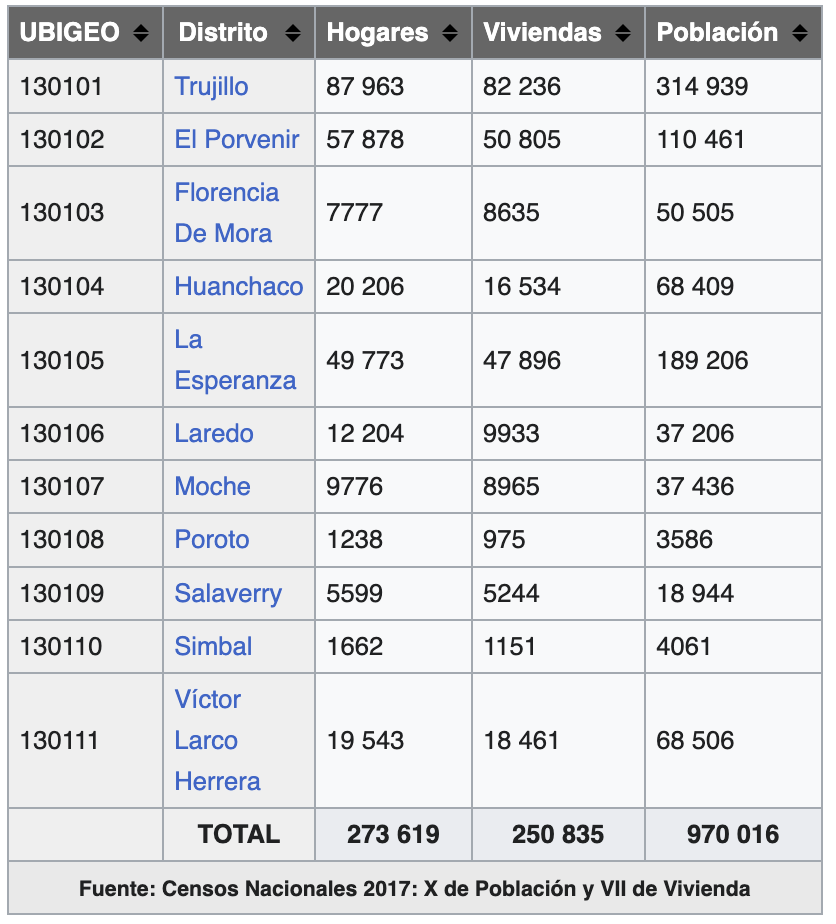

Déjalo en formato DataFrame


In [ ]:
import pandas as pd
import requests as req
from bs4 import BeautifulSoup as bs

In [64]:
# extra
url = 'https://es.wikipedia.org/wiki/Provincia_de_Trujillo_(Per%C3%BA)'

# tabla del censo

### Solucion Alex

In [ ]:
html = req.get(url).text
soup = bs(html, 'html.parser')
# indico la tabla concreta que es
tabla = soup.find('table', {'class':'wikitable sortable'})
# de todas las etiquetas 'tr' las columnas están en la primera
encabezados = [col.text for col in tabla.find_all('tr')[0]]
# el resto son filas
filas = [fila for fila in tabla.find_all('tr')[1:]]
# la fila con el total es la penultima
fila_total = filas[-2]
# el pie de tabla es la ultima fila
footer = filas[-1]

In [ ]:
encabezados = [col.split('\n')[0] for col in encabezados[1::2]]
encabezados

In [ ]:
filas = [[celda.text
          .split('\n')[0] # haz split por el salto de linea y quedate el primer elemento
                          # en el replace sustituye eso por una string vacia, asi tengo el numero en formato entendible
                          # por cada celda que hay dentro de la fila, que fila esta dentro de filas
          .replace('\xa0', '') \
            for celda in fila.find_all('td')] \
                for fila in filas]
filas = filas[0:len(filas)-2] # quito las dos vacias
filas

In [ ]:
fila_total = [celda.text.split('\n')[0].replace('\xa0','').replace(' ', '') for celda in fila_total][3::2]
# necesito que en la primera columna no haya nada y como no se que conviene mas
# en lugar de poner nan pongo un '-'
fila_total.insert(0, '-')
fila_total

In [ ]:
texto_footer = footer.find('th').text.split('\n')[0]
# no puedo fusionar celdas con pandas
ultima_fila = ['-', texto_footer, '-', '-', '-']
ultima_fila

In [ ]:
# lo añado a mi lista de filas
filas.append(fila_total)
filas.append(ultima_fila)

In [ ]:
# DataFrame
df = pd.DataFrame(filas, columns=encabezados)
df

Pandas no puede fusionar celdas, así que si queremos tener la información de cuál es la fuente de datos 

# 4 - Geolocalizando una IP

In [2]:
import requests as req
from bs4 import BeautifulSoup as bs

**¿Dónde estoy?** --> https://tools.keycdn.com/geo

Esta web nos da toda la información de la IP que introducimos.

In [3]:
url='https://tools.keycdn.com/geo'

In [4]:
html = req.get(url).content # hace lo mismo que .text

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

WTF? Que ha pasado



que es un [user agent] ??(https://www.zenrows.com/blog/user-agent-web-scraping#what-is)

User agents for web scraping --> [link](https://useragentstring.com/pages/Browserlist/)

In [8]:
headers = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) Version/6.0 Mobile/10A5355d Safari/8536.25'}

response = req.get('http://httpbin.org/headers', headers=headers)

print(response.status_code)
print(response.text)

200
{
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate, br", 
    "Host": "httpbin.org", 
    "User-Agent": "Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) Version/6.0 Mobile/10A5355d Safari/8536.25", 
    "X-Amzn-Trace-Id": "Root=1-66e878e5-639424233f3ff4780b79f889"
  }
}



Se ha tenido que añadir un diccionario que contiene 'User-agent'. Hay muchos sitios web que van a poner impedimentos para que podamos obtener la información a través del scrapeo. Estamos haciendo una petición sin cabecera y no puede identificar el navegador que se está utilizando para acceder.

Cuando accedemos a una web pedimos acceso aportando mucha información en los metadatos: quién soy, dónde estoy...

Al hacer un `get` a pelo no está la información del navegador, se nos detecta como bot y se nos corta el acceso.

Esta información se contiene en lo que se llama **cabecera**. Tal como indico en el diccionario le estoy diciendo a esta web que estoy accediendo desde el navegador Mozilla en su versión 5.0. Estoy intentando sacar información de la web que, a priori, no debería poder sacar. Esta web pone un impedimento para ello, pero hay una solución, la cabecera (el **`header=`**).


In [1]:
http://httpbin.org/headers

SyntaxError: invalid syntax (832054228.py, line 1)

In [ ]:
https://useragentstring.com/pages/Browserlist/

In [75]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}

html = req.get('https://tools.keycdn.com/geo', headers=headers)

print(html.status_code)
print(html.text)


200

<!DOCTYPE html>
<html lang="en" prefix="og: https://ogp.me/ns#">
    <head>
        <meta charset="utf-8">
        <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">
        <meta name="version" content="57ed0a7e3b29ae8f3a50b7d383902359f80ff602">

        <title>IP Location Finder - IP Lookup With Detailed Geolocation Data | KeyCDN Tools</title>
        <meta name="description" content="What is my IP address? Lookup an IP address or hostname to get the geographical location.">

        <meta name="twitter:card" content="summary_large_image">
        <meta name="twitter:site" content="@KeyCDN">
        <meta name="twitter:creator" content="@KeyCDN">
        <meta property="og:url" content="https://tools.keycdn.com/geo">
        <meta property="og:type" content="website">
        <meta property="og:title" content="IP Location Finder - IP Lookup With Detailed Geolocation Data | KeyCDN Tools">
        <meta property="og:description" content="What is

In [78]:
# soup parseada para tener el HTML legible
soup = bs(html.text, 'html.parser')

In [79]:
print(soup.prettify()[:1000]) # con .prettify() lo que hago es poner el código todavía más legible, con indentación
                       # .prettify() funciona distinto dentro que fuera de la función print()

<!DOCTYPE html>
<html lang="en" prefix="og: https://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <meta content="57ed0a7e3b29ae8f3a50b7d383902359f80ff602" name="version"/>
  <title>
   IP Location Finder - IP Lookup With Detailed Geolocation Data | KeyCDN Tools
  </title>
  <meta content="What is my IP address? Lookup an IP address or hostname to get the geographical location." name="description"/>
  <meta content="summary_large_image" name="twitter:card"/>
  <meta content="@KeyCDN" name="twitter:site"/>
  <meta content="@KeyCDN" name="twitter:creator"/>
  <meta content="https://tools.keycdn.com/geo" property="og:url"/>
  <meta content="website" property="og:type"/>
  <meta content="IP Location Finder - IP Lookup With Detailed Geolocation Data | KeyCDN Tools" property="og:title"/>
  <meta content="What is my IP address? Lookup an IP address or hostname to get the geographical location." propert

Utilizando el inspector en el navegador podemos activar el cursor y encontrar en qué parte del código HTML se encuentra el elemento que necesitamos. Una vez identificado lo buscamos en nuestra *sopa*

In [80]:
print(soup.find('div', {'id': 'geoResult'}).prettify()) # conseguido con el inspector

<div class="mt-4" id="geoResult">
 <div class="bg-light medium rounded p-3">
  <p class="small text-uppercase text-muted font-weight-semi-bold line-height-headings mb-2">
   Location
  </p>
  <dl class="row mb-0">
   <dt class="col-4">
    City
   </dt>
   <dd class="col-8 text-monospace">
    Madrid
   </dd>
   <dt class="col-4">
    Region
   </dt>
   <dd class="col-8 text-monospace">
    Madrid (M)
   </dd>
   <dt class="col-4">
    Postal code
   </dt>
   <dd class="col-8 text-monospace">
    28026
   </dd>
   <dt class="col-4">
    Country
   </dt>
   <dd class="col-8 text-monospace">
    Spain (ES)
   </dd>
   <dt class="col-4">
    Continent
   </dt>
   <dd class="col-8 text-monospace">
    Europe (EU)
   </dd>
   <dt class="col-4">
    Coordinates
   </dt>
   <dd class="col-8 text-monospace">
    40.3907 (lat) / -3.6997 (long)
   </dd>
   <dt class="col-4">
    Time
   </dt>
   <dd class="col-8 text-monospace">
    2024-09-13 20:49:30 (Europe/Madrid)
   </dd>
  </dl>
  <p class

In [81]:
tabla = soup.find('div', {'id': 'geoResult'}) # le llamo tabla, pues acabará siendo nuestra tabla
info = tabla.find('div', {'class': 'bg-light medium rounded p-3'}) # la información que tendrá la tabla está aquí

Ahora que ya sé dónde está la información que necesito y tengo una variable que la alberga puedo buscar más profundamente hasta poder extraer los datos que necesito.

Toda la info la tengo dentro de ese `<div>` veo que lo tengo en una lista con la class='row mb-0'

Pero cuidado porque hay dos clases iguales.

Accedamos a info para que nos dé todos los dd que tenga la clase col-8 text-monospace. Así me va a dar todos los que hay con la misma etiqueta y la misma clase.

Por comodidad de lectura del código esto lo guardamos en una variable que se llama detalles, al fin y al cabo son los detalles de la información que contendrá la tabla que estamos haciendo.

In [82]:
detalles = info.find_all('dd', {'class': 'col-8 text-monospace'}) #Elemento y añado tb la clase

Hago una lista con el texto que hay en cada elemento de detalles. Le llamo conexión pues son los detalles de la info de esa conexión IP.

In [84]:
conexion = [e.text for e in detalles]
conexion

['Madrid',
 'Madrid (M)',
 '28026',
 'Spain (ES)',
 'Europe (EU)',
 '40.3907 (lat) / -3.6997 (long)',
 '2024-09-13 20:49:30 (Europe/Madrid)',
 '47.61.8.143',
 '47-61-8-143.red-acceso.airtel.net',
 'Vodafone Spain',
 '12430']

Necesito hacer un diccionario. `<dd>` es la información de la conexión. `<dt>` tiene el nombre de cada una de las filas (es la columna de la izquierda). Por ello cojo esa información y lo uso como `keys`, mientras que lo que hemos hecho hasta ahora serán los `values`.

In [85]:
keys = [e.text for e in tabla.find_all('dt')]
keys

['City',
 'Region',
 'Postal code',
 'Country',
 'Continent',
 'Coordinates',
 'Time',
 'IP address',
 'Hostname',
 'Provider',
 'ASN']

In [86]:
dicc = {k:v for k,v in zip(keys,conexion)} #me hago un diccionario con los datos de la conexion

In [87]:
dicc

{'City': 'Madrid',
 'Region': 'Madrid (M)',
 'Postal code': '28026',
 'Country': 'Spain (ES)',
 'Continent': 'Europe (EU)',
 'Coordinates': '40.3907 (lat) / -3.6997 (long)',
 'Time': '2024-09-13 20:49:30 (Europe/Madrid)',
 'IP address': '47.61.8.143',
 'Hostname': '47-61-8-143.red-acceso.airtel.net',
 'Provider': 'Vodafone Spain',
 'ASN': '12430'}

In [88]:
import pandas as pd
ip = pd.DataFrame(dicc, index = [0]) #al ser valores escalares hay que proporcionar índice
                                     #al aportar índice se genera una única fila
ip

,City,Region,Postal code,Country,Continent,Coordinates,Time,IP address,Hostname,Provider,ASN
0,Madrid,Madrid (M),28026,Spain (ES),Europe (EU),40.3907 (lat) / -3.6997 (long),2024-09-13 20:49:30 (Europe/Madrid),47.61.8.143,47-61-8-143.red-acceso.airtel.net,Vodafone Spain,12430


**Búsqueda según IP**

https://tools.keycdn.com/geo?host=137.255.90.7

In [90]:
#Mi url ha cambiado
url_ip = 'https://tools.keycdn.com/geo?host=88.30.60.7'

In [9]:
url_ip='https://tools.keycdn.com/geo?host=137.255.90.7' #tengo parámetros en la direccion en funcion de la IP que busque...🤔

html = req.get(url_ip, headers = headers).content

soup=bs(html, 'html.parser')

In [92]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en" prefix="og: https://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <meta content="57ed0a7e3b29ae8f3a50b7d383902359f80ff602" name="version"/>
  <title>
   IP Location Finder - IP Lookup With Detailed Geolocation Data | KeyCDN Tools
  </title>
  <meta content="What is my IP address? Lookup an IP address or hostname to get the geographical location." name="description"/>
  <meta content="summary_large_image" name="twitter:card"/>
  <meta content="@KeyCDN" name="twitter:site"/>
  <meta content="@KeyCDN" name="twitter:creator"/>
  <meta content="https://tools.keycdn.com/geo?host=137.255.90.7" property="og:url"/>
  <meta content="website" property="og:type"/>
  <meta content="IP Location Finder - IP Lookup With Detailed Geolocation Data | KeyCDN Tools" property="og:title"/>
  <meta content="What is my IP address? Lookup an IP address or hostname to get the geographical 

Es igual que antes, pues la estructura es la misma, primero saco todos los `<dd>`luego todos los `<dt>`

In [93]:
tabla = soup.find('div', {'id': 'geoResult'})
tabla.find_all('dd', {'class': 'col-8 text-monospace'})

[<dd class="col-8 text-monospace">Benin (BJ)</dd>,
 <dd class="col-8 text-monospace">Africa (AF)</dd>,
 <dd class="col-8 text-monospace">9.5 (lat) / 2.25 (long)</dd>,
 <dd class="col-8 text-monospace">2024-09-13 20:13:20 (Africa/Porto-Novo)</dd>,
 <dd class="col-8 text-monospace">137.255.90.7</dd>,
 <dd class="col-8 text-monospace">137.255.90.7</dd>,
 <dd class="col-8 text-monospace">SBIN</dd>,
 <dd class="col-8 text-monospace">28683</dd>]

In [94]:
tabla.find_all('dt')

[<dt class="col-4">Country</dt>,
 <dt class="col-4">Continent</dt>,
 <dt class="col-4">Coordinates</dt>,
 <dt class="col-4">Time</dt>,
 <dt class="col-4">IP address</dt>,
 <dt class="col-4">Hostname</dt>,
 <dt class="col-4">Provider</dt>,
 <dt class="col-4">ASN</dt>]

In [ ]:
#'{:2.2f}'.format(12.5436363636363)  # formato en strings de numeros

Puedo hacer una función que haga de golpe todo lo que hemos hecho hasta ahora con una dirección IP

In [10]:
def geo(ip):

    url = f'https://tools.keycdn.com/geo?host={ip}' #Dinamica en fucnion de la IP que quiero buscar

    html = req.get(url, headers = headers).content

    soup = bs(html, 'html.parser')

    tabla = soup.find('div', {'id': 'geoResult'})

    conexion = [e.text for e in tabla.find_all('dd', {'class': 'col-8 text-monospace'})]

    return conexion

Vimos que una url también puede tener diferentes parámetros. ¿Qué pasa si tengo una lista de IP de la que quiero obtener la información y hacerme un dataframe?

In [11]:
list_ip = ['137.255.90.7', '195.255.90.10', '177.255.21.7']

Sacad un DataFrame que tenga la información de las direcciones IP contenidas en `list_ip`:
1. probad a hacer vuestra propia funcion
2. haced el scrapeo "manual"
3. hacedlo utilizando la funcion

In [20]:
def geo_completa(ip):

    url = f'https://tools.keycdn.com/geo?host={ip}' #Dinamica en fucnion de la IP que quiero buscar

    html = req.get(url, headers = headers).content

    soup = bs(html, 'html.parser')

    tabla = soup.find('div', {'id': 'geoResult'})

    valores = [e.text for e in tabla.find_all('dd', {'class': 'col-8 text-monospace'})]
    columnas = [e.text for e in tabla.find_all('dt', {'class': 'col-4'})]

    dicc_respuesta = {k:v for k,v in zip(columnas, valores)}

    return dicc_respuesta

In [22]:
# Inténtalo tú (alumnos)
resultados = []

for ip in list_ip :
    resultados.append(geo_completa(ip))

list

### Resultado con una simple llamada a una función

In [ ]:
# @title
def geolocalizacion_ip(lista):
  #crea una lista vacía en la que va a ir metiendo cada diccionario
  lista_data= []

  #bucle que itera cada elemento de la lista que entra en la función
  for ip in lista:
    url = f'https://tools.keycdn.com/geo?host={ip}' #Dinamica en fucnion de la IP que quiero buscar

    html = req.get(url, headers = user_agent).content

    soup = bs(html, 'html.parser')

    tabla = soup.find('div', {'id': 'geoResult'})

    #hago una lista con la información de cada fila
    informacion = [e.text for e in tabla.find_all('dd', {'class': 'col-8 text-monospace'})]

    #hago una lista con la información de las columnas (que usaré como keys del diccionario)
    columnas = [e.text for e in tabla.find_all('dt', {'class': 'col-4'})]

    #hago un diccionario que una vez hecho meto en la lista vacía del principio
    data= dict(zip(columnas,informacion))
    lista_data.append(data)

  #fuera del bucle genero el DataFrame con la lista de diccionarios, dando como índices la lista que entra
  #así cada fila tendrá como índice su ip
  df= pd.DataFrame(lista_data, index= lista)


  return df

In [ ]:
geolocalizacion_ip(list_ip).T # con .T pivoto el DataFrame

### RECORDATORIO de como hacer un df desde una lista de diccionarios

In [27]:
import pandas as pd

dicc1 = {'a': 1, 'b': 2, 'c': 3}
dicc2 = {'a': 23, 'b': 52, 'd': 666}
lista_diccionarios = [dicc1, dicc2]

df = pd.DataFrame(lista_diccionarios)
df

,a,b,c,d
0,1,2,3.0,NaN
1,23,52,NaN,666.0


In [29]:
resultados_en_df =  pd.DataFrame(resultados)
resultados_en_df

,Country,Continent,Coordinates,Time,IP address,Hostname,Provider,ASN,City,Region,Postal code
0,Benin (BJ),Africa (AF),9.5 (lat) / 2.25 (long),2024-09-16 19:56:21 (Africa/Porto-Novo),137.255.90.7,137.255.90.7,SBIN,28683,NaN,NaN,NaN
1,Finland (FI),Europe (EU),60.1797 (lat) / 24.9344 (long),2024-09-16 21:56:22 (Europe/Helsinki),195.255.90.10,ws10.lonne.fi,Elisa Oyj,719,Helsinki,Uusimaa (18),00141
2,Colombia (CO),South America (SA),10.4013 (lat) / -75.5267 (long),2024-09-16 13:56:22 (America/Bogota),177.255.21.7,dinamic-tigo-177-255-21-7.tigo.com.co,Colombia Movil,27831,Cartagena,Departamento de Bolívar (BOL),130005


In [30]:
resultados

[{'Country': 'Benin (BJ)',
  'Continent': 'Africa (AF)',
  'Coordinates': '9.5 (lat) / 2.25 (long)',
  'Time': '2024-09-16 19:56:21 (Africa/Porto-Novo)',
  'IP address': '137.255.90.7',
  'Hostname': '137.255.90.7',
  'Provider': 'SBIN',
  'ASN': '28683'},
 {'City': 'Helsinki',
  'Region': 'Uusimaa (18)',
  'Postal code': '00141',
  'Country': 'Finland (FI)',
  'Continent': 'Europe (EU)',
  'Coordinates': '60.1797 (lat) / 24.9344 (long)',
  'Time': '2024-09-16 21:56:22 (Europe/Helsinki)',
  'IP address': '195.255.90.10',
  'Hostname': 'ws10.lonne.fi',
  'Provider': 'Elisa Oyj',
  'ASN': '719'},
 {'City': 'Cartagena',
  'Region': 'Departamento de Bolívar (BOL)',
  'Postal code': '130005',
  'Country': 'Colombia (CO)',
  'Continent': 'South America (SA)',
  'Coordinates': '10.4013 (lat) / -75.5267 (long)',
  'Time': '2024-09-16 13:56:22 (America/Bogota)',
  'IP address': '177.255.21.7',
  'Hostname': 'dinamic-tigo-177-255-21-7.tigo.com.co',
  'Provider': 'Colombia Movil',
  'ASN': '27831

### Ejemplo LinkedIn

In [ ]:
#Vamos intentar scrapear Linkedin
URL='https://www.linkedin.com/jobs/search/' #Esta es la direccion de la pagina de busqueda de empleo de Linkedin general

A esta direccion le podemos poner parametros para afinar nuestra búsqueda.

URL = 'https://www.linkedin.com/jobs/search/?keywords=data&location=Madrid&refresh=true'

`?keywords=data` nos dice que la palabra clave que queremos buscar es 'data'
    
`&location=Madrid` nos dice que queremos buscar en Madrid
    
`&refresh=true` nos dice que queremos que nos devuelva los resultados más recientes

Podemos filtrar más nuestra búsqueda en la web y veremos que van apareciendo más ***parametros*** en la URL.

`&f_TPR=r120960` nos dice que empleos de la ultima semana. El parámetro va en segundos así que 60 * 60 * 24 * número de días atrás que queremos buscar

`&start={i*25}` donde i sería el número de página


In [52]:
#Vamos a intentar scrapear esta URL
import requests as req
from bs4 import BeautifulSoup as bs
url = 'https://www.linkedin.com/jobs/search/?keywords=data&location=Espa%C3%B1a&refresh=true%27&position=1&pageNum=0'
html = req.get(url).content
soup=bs(html, 'html.parser')

In [53]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="d_jobs_guest_search" name="pageKey"/>
  <!-- -->
  <meta content="urlType=jserp_custom;emptyResult=false" name="linkedin:pageTag"/>
  <meta content="en_US" name="locale"/>
  <meta data-app-version="2.0.1974" data-browser-id="0d4d527e-f2e6-4c77-8420-4404d50733b1" data-call-tree-id="AAYiZ70YtKXgy94sKXmLdg==" data-dfp-member-lix-treatment="control" data-disable-jsbeacon-pagekey-suffix="false" data-dna-member-lix-treatment="control" data-enable-page-view-heartbeat-tracking="" data-human-member-lix-treatment="control" data-member-id="0" data-multiproduct-name="jobs-guest-frontend" data-page-instance="urn:li:page:d_jobs_guest_search;hPBABDyUQIevuSCxVd+QvQ==" data-service-name="jobs-guest-frontend" id="config"/>
  <link href="https://www.linkedin.com/jobs/data-jobs" rel="canonical"/>
  <!-- -->
  <!-- -->
  <!-- -->
  <!-- -->
  <!-- -->
  <!-- -->
  <link href="https://static.licdn.com/aero-v1/sc/h/al2o9zrvru7aqj8e1x2rzsrca" rel="icon

In [56]:
# Intentad sacar los ingredientes de la recete de esta sopa y obtener para cada oferta de trabajo:

lista_ofertas = []
#Listado de ofertas
ofertas = soup.find_all('div', {'class':'base-card relative w-full hover:no-underline focus:no-underline base-card--link base-search-card base-search-card--link job-search-card'})

for oferta in ofertas[:3]:
    dicc_oferta = {} #Diccionario donde almacenamos datos de 1 oferta
    #Titulo oferta
    titulo_oferta = oferta.find('span', {'class':'sr-only'}).text.strip()
    dicc_oferta['titulo_oferta'] = titulo_oferta

    # - Empresa
    empresa = oferta.find('a', {'class':'hidden-nested-link'}).text.strip()
    dicc_oferta['empresa'] = empresa
    
    # - Ubicacion
    ubicacion = oferta.find('span', {'class':'job-search-card__location'}).text.strip()
    dicc_oferta['ubicacion'] = ubicacion
    
    # - Link de la empresa
    link_empresa = oferta.find('a', {'class':'hidden-nested-link'}).attrs['href']
    dicc_oferta['link_empresa'] = link_empresa

    # - Link de la oferta
    link_oferta = oferta.find('a', {'class': 'base-card__full-link absolute top-0 right-0 bottom-0 left-0 p-0 z-[2]'}).attrs['href']
    dicc_oferta['link_oferta'] = link_oferta
    
    # - Fecha de publicacion
    #Tengo ofertas que no tienen la clase que estamos buscando por lo que cambiamos nuestro código
    #fecha_publicacion = oferta.find('time', {'class':'job-search-card__listdate--new'}).attrs['datetime']
    fecha_publicacion = oferta.find('time').attrs['datetime']
    dicc_oferta['fecha_publicacion'] = fecha_publicacion
    
    
    #Appendeamos a nuestra lista de diccionarios de respuesta
    lista_ofertas.append(dicc_oferta)    

In [57]:
lista_ofertas[0]

{'titulo_oferta': 'Executive Assistant',
 'empresa': 'LinkedIn',
 'ubicacion': 'Mountain View, CA',
 'link_empresa': 'https://www.linkedin.com/company/linkedin?trk=public_jobs_jserp-result_job-search-card-subtitle',
 'link_oferta': 'https://www.linkedin.com/jobs/view/executive-assistant-at-linkedin-4029190592?position=1&pageNum=0&refId=tngTsFdRrVHIjzNfqBNUrg%3D%3D&trackingId=bUDlsPB5WL%2FRiWKoA1qJhA%3D%3D&trk=public_jobs_jserp-result_search-card',
 'fecha_publicacion': '2024-09-18'}

In [45]:
ofertas[1].find('a', {'class': 'base-card__full-link absolute top-0 right-0 bottom-0 left-0 p-0 z-[2]'}).attrs['href']

'https://www.linkedin.com/jobs/view/data-analyst-at-opinion-focus-panel-4026276503?position=2&pageNum=0&refId=kfZCYO2147wP1%2FsyH0guAA%3D%3D&trackingId=BB87MzPY5IWzw6%2BlGee0%2Fw%3D%3D&trk=public_jobs_jserp-result_search-card'

In [ ]:
#Os recomiendo ir echando una ojeada al html y la sopa poco a poco para ver como esta estructurado
#Lo primero que tendremos que buscar será el elemento que contiene todas las ofertas....🤔

#PISTA -- base-search-card__info
#De aqui en adelante vosotros solos, tened presente que querremos guardar toda esa info en un dataframe

### REDDIT - https://www.reddit.com/r/Python/

In [58]:
url = 'https://www.reddit.com/r/Python/'
html = req.get(url).content
soup = bs(html, 'html.parser')

In [59]:
print(soup.prettify())

<!DOCTYPE html>
<html class="theme-beta" lang="en-US">
 <head prefix="og: https://ogp.me/ns#">
  <title>
   Reddit - Dive into anything
  </title>
  <meta content="width=device-width, initial-scale=1, viewport-fit=cover" name="viewport"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="black" name="apple-mobile-web-app-status-bar-style"/>
  <meta content="#000000" name="msapplication-navbutton-color"/>
  <meta content="#000000" name="theme-color"/>
  <meta content="noarchive" name="bingbot">
   <link crossorigin="anonymous" href="https://www.redditstatic.com/" rel="preconnect"/>
   <link href="https://www.redditstatic.com/" rel="dns-prefetch"/>
   <script nonce="yXpmhekKMLL23Jkh7LZAUw==" type="module">
    !function(e,n,o,t,i,r,d){var a=!1,c=!1,f=[],s=function(e){("e"in e||"p"in e||e.f&&e.f.indexOf("capture")>-1||e.f&&e.f.indexOf("withScope")>-1||e.f&&e.f.indexOf("showReportDialog")>-1)&&u(f),s.data.push(e)};function u(n){function o(){import("https://www.re

In [60]:
#Vamos a sacar info de los artículos de la página de Reddit
articulos = soup.find_all('article', {'class':'w-full m-0'})
articulos[0]

<article aria-label="Introducing FastAgency: the fastest way to deploy a console or web app from your AutoGen workflow" class="w-full m-0">
<!-- "data-ks-item" is used by the modqueue-keyboard-shortcuts manager to fetch the item on which to dispatch events to -->
<shreddit-post app="" author="davorrunje" author-id="t2_bt7vm" class="block relative cursor-pointer group bg-neutral-background focus-within:bg-neutral-background-hover hover:bg-neutral-background-hover xs:rounded-[16px] px-md py-2xs my-2xs nd:visible" comment-count="0" content-href="https://www.reddit.com/r/Python/comments/1fjrqui/introducing_fastagency_the_fastest_way_to_deploy/" created-timestamp="2024-09-18T12:37:33.082000+0000" data-ks-item="" domain="self.Python" feedindex="0" icon="https://styles.redditmedia.com/t5_1uq6xv/styles/profileIcon_snooa14098e1-befb-456e-9b83-03c1cfcd321a-headshot.png?width=64&amp;height=64&amp;frame=1&amp;auto=webp&amp;crop=64:64,smart&amp;s=e21a31fa552d404d131009debb69c5ff8eafc63b" id="t3_1fj

In [37]:
#De cada artículo vamos a sacar su autor

3

In [41]:
#Vamos a sacar el tipo de artículo

In [ ]:
#Tipo articulo

Cuando tengo una etiqueta sea la que sea dentro tengo su clase, id, y más atributos. href, title, target...

El contenido de los atributos también es accesible.

In [ ]:
#Vamos a coger la url de cada uno de los artículos


Una web no carga todo el contenido de golpe. Tiene contenido dinámico. En el caso de reddit lo primero que ves son únicamente 3 artículos. El resto los va cargando sobre la marcha. Es lo que se llama lazy-loading. Esto se hace porque tienes la inmediatez de contenido nada más entrar y el resto lo va cargando mientras vas interaccionando con el sitio web. 

Con `beautifulSoup` tenemos una limitación. Hace la llamada y se queda con el html que hay en esa primera carga de la web sin ningún tipo de interacción. Para poder superar esta barrera necesitamos poder interaccionar con la página. Aquí es cuando entra la librería que vamos a utilizar, entre muchas otras que hay, llamada `Selenium`. Con ella podemos interaccionar con la página y vamos a poder hacer scroll, esparar a que aparezcan elementos visibles, cerrar pop-ups que aparecen... Cuando tenemos la página como necesitamos es cuando podemos coger toda la información.

`Selenium` se va a encargar de ir al punto de la página que queremos y al llegar a ese punto le vamos a dar a `BeautifulSoup` el código de toda la página cargada como la necesitamos y extraeremos la información del código `html`. 

En resumen, con `Selenium` me dejo la página cargada como la quiero y con `BeautifulSoup` -habiéndole pasado el html- extraigo la información y la dejo preparada para estructurar los datos como necesitamos.